In [7]:
import csv
import os
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [8]:
data_folder_t1 = 'ehr-804370-test-1'
data_folder_t2 = 'ehr-804371-test-2'

DATA_PATH = os.path.expanduser('~/data1/ehr-stratification/data')

enc_file = 'encodings/convae-cut-{0}-avg_scaled.csv'

In [9]:
with open(os.path.join(DATA_PATH, data_folder_t1, 
                       enc_file.format('PC'))) as f:
    rd = csv.reader(f)
    convae_emb = {r[0]: list(map(lambda x: float(x), r[1:])) for r in rd}

In [10]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(list(convae_emb.values()))

In [11]:
Z = linkage(np.array(scaled_data), 'ward')

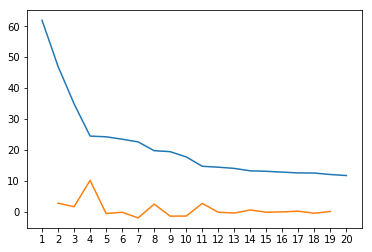

clusters: 4


In [12]:
last = Z[-20:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1, dtype=int)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.xticks(idxs)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)